# Performance Comparison

/Users/mingdama/miniconda3/envs/ml/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/mingdama/miniconda3/envs/ml/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


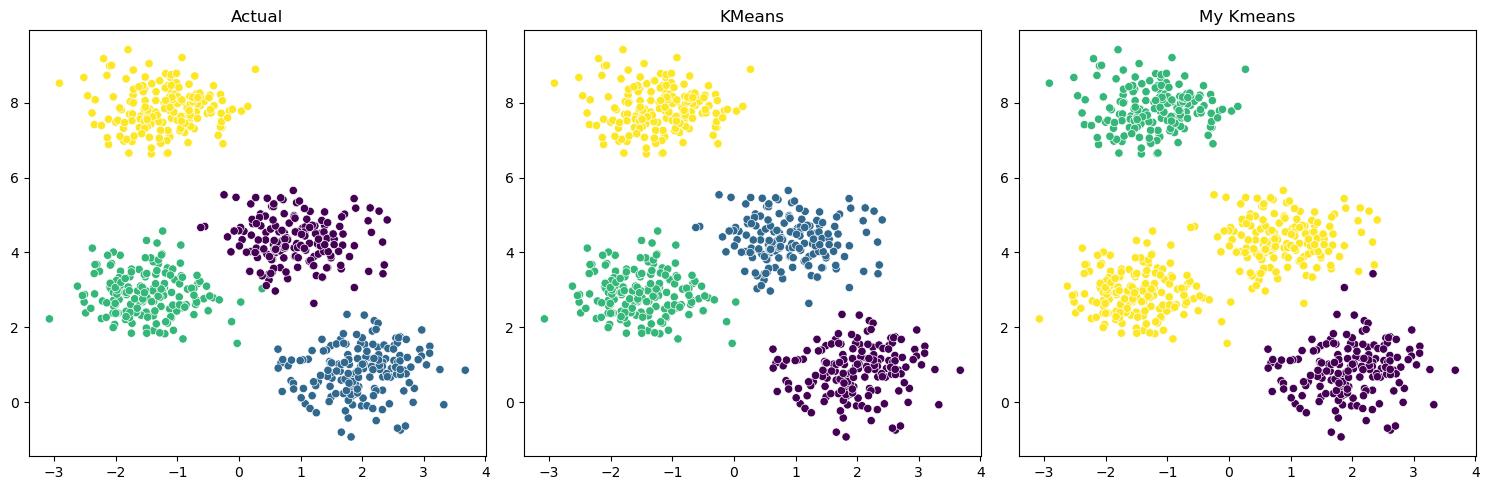

In [1]:
from cluster import cluster as MyCluster
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, cluster_assignments = make_blobs(n_samples=700, centers=4, cluster_std=0.60, random_state=0)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Actual
sns.scatterplot(x=X[:, 0], y=X[:, 1], c=cluster_assignments, ax=axes[0])
axes[0].set_title('Actual')

# KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
sns.scatterplot(x=X[:, 0], y=X[:, 1], c=kmeans.labels_, ax=axes[1])
axes[1].set_title('KMeans')

# My Implementation of KMeans
my_cluster = MyCluster(k=4)  # Use the new alias for the class
clusters, centroids = my_cluster.fit(X)
sns.scatterplot(x=X[:, 0], y=X[:, 1], c=clusters, ax=axes[2])
axes[2].set_title('My Kmeans')

plt.tight_layout()
plt.show()

Clusters generated by KMeans is closer to actual clusters and the result is very consistent and stable, but my implementation of KMeans only occasionally generate clusters that are similar to KMeans, but it is far  less than KMeans provided by SKlearn library

# Choose and run clustering algorithms

## The reason why you chose the clustering algorithm(s)

I choose KMeans algorithm, the reasons are below:
- Different cluster algorithms have different ways of determining the most ideal number of clusters. for KMeans, we have to generate an elbow graph; for DBSCAN, we have to find the perfect combination of eps and min_samples value; for Hierarchical, we have to find out the best distance threshold. Out of all the preperation works that we have to do, elbow graph for KMeans is visually and conceptually easiest to understand.
- KMeans runs faster than DBSCAN and Hierarchical, especially on large dataset like Chicago taxi data, but KMeans and DBSCAN run at similar speed on smaller dataset like the Mopsi data. Hierarchical is the worst in terms of speed (it crushes my kernal when I try to run Hierarchical on Chicago taxi data).
- KMeans has consistent performance for both large and small dataset, which means it would always be a good choice when we don't know which algorithm to choose

## Any pre-processing of the data or any hyperparameter settings
For Chicago taxi data, I did following pre-processing:
- I chose to work on 'Pickup Centroid Longitude' and 'Pickup Centroid Longitude'.
- There are missing data in the new dataframe, so filtered out rows that have missing data.

For Mopsi data, I did following pre-precessing:
- I assigned names for two columns, first column is latitude and second column is longitude

## Output from the algorithm(s) -- show what clusters were generated
see output in later sections

## The metrics you used to evaluate the output. What kind of performance did you get from that algorithm? Is that what you expected?
- Visually, clusters generated by KMeans are less scattered, especially when we find the ideal number of clusters
- All clustering algorithms roughly give us an idea about density distribution of a region, but generally speaking, KMeans does better at seperating clusters evenly
- From silhouette scores we get from different clustering algorithms on both Chicago taxi data and Mopsi data, KMeans performs well with both small and large dataset, scoring 0.7 for Chicago taxi data and 0.8 for Mopsi data. KMeans, DBSCAN, and Hierarchical performs equally good for smaller dataset.
- It's easier to find the best number of clusters for kmeans, but it is more difficult to find best combination of eps and min_samples for DBSCAN and distance threshold for Hierarchical

# Chicago Taxi Data

## EDA

In [2]:
import pandas as pd

df = pd.read_csv('Taxi Trips 2013-2023.csv')
df

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,52dc9029821e61db30a51838cb3cd711bd0e03cb,275f3f891b8c0ba8f2958873f850d2a03993c99f5f79f6...,02/01/2023 12:15:00 AM,02/01/2023 12:30:00 AM,1140.0,11.20,NaN,NaN,76.0,NaN,...,21.0,49.75,Cash,4053 - 40193 Adwar H. Nikola,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),NaN,NaN,NaN
1,11eeb6710caa0606028c7ba025bfa18c277886e8,6c87f1d023a9d7146ae81b6aa4648bf98cec52cceb9f08...,02/01/2023 12:15:00 AM,02/01/2023 12:15:00 AM,660.0,2.70,NaN,NaN,32.0,7.0,...,0.0,13.00,Credit Card,Taxi Affiliation Services,41.878866,-87.625192,POINT (-87.6251921424 41.8788655841),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843)
2,113aa7bf346c585bb941cda2d5c0015c8a1472f0,bb4e75d3065311c33024a434640731c43fd2cf9e4482eb...,02/01/2023 12:15:00 AM,02/01/2023 12:30:00 AM,480.0,0.00,NaN,NaN,8.0,24.0,...,0.0,9.75,Credit Card,Taxi Affiliation Services,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.901207,-87.676356,POINT (-87.6763559892 41.9012069941)
3,2503e3944e5c82b89638447ad361638111129375,57c40509cae37a0e5e536a657cdb7f8c6824314bc466a7...,02/01/2023 12:15:00 AM,02/01/2023 12:45:00 AM,1620.0,0.00,1.703198e+10,NaN,76.0,NaN,...,28.0,91.00,Credit Card,Taxi Affiliation Services,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),NaN,NaN,NaN
4,23ddcfba2ad714fe0303909961ea74873be50da2,40720025b84fa778c47d6637db01b1d8f2de2eabafa529...,02/01/2023 12:15:00 AM,02/01/2023 12:15:00 AM,360.0,0.10,NaN,NaN,76.0,NaN,...,4.0,13.75,Cash,Taxi Affiliation Services,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101783,9209df4c3541198fda3173a226f2df619a806022,dee6032433df09fe8d3fd4fa958380308c902dc98f81c3...,02/07/2023 11:45:00 PM,02/07/2023 11:45:00 PM,760.0,2.69,1.703183e+10,1.703132e+10,28.0,32.0,...,0.0,10.90,Mobile,Medallion Leasin,41.885281,-87.657233,POINT (-87.6572331997 41.8852813201),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918)
101784,f0957a8f6bef37bb2872649fb3c76ad1a179acab,3f6562a2a18861cf21a21101c14cc91dd7c4d72cdce80f...,02/07/2023 11:45:00 PM,02/07/2023 11:45:00 PM,4.0,0.00,NaN,NaN,8.0,8.0,...,0.0,77.40,Credit Card,Chicago Independents,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
101785,4cb74df671cfccceb9b592f347ef1a94c1540c7a,b31f46efa11263565e3dba91f26ff96b74516e8108ac56...,02/14/2023 10:30:00 AM,02/14/2020 06:00:00 PM,NaN,2.90,NaN,NaN,8.0,24.0,...,0.0,13.50,Cash,Taxi Affiliation Services,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.901207,-87.676356,POINT (-87.6763559892 41.9012069941)
101786,7f24c5101df65952ef318f558b8b071989ff7c17,65057dc10e707a18a32bc4371c5db0b828e90f9caf1068...,04/27/2023 11:15:00 AM,04/21/2019 09:30:00 PM,NaN,15.10,NaN,NaN,76.0,7.0,...,4.0,52.90,Credit Card,Taxi Affiliation Services,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101788 entries, 0 to 101787
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Trip ID                     101788 non-null  object 
 1   Taxi ID                     101779 non-null  object 
 2   Trip Start Timestamp        101788 non-null  object 
 3   Trip End Timestamp          101788 non-null  object 
 4   Trip Seconds                101763 non-null  float64
 5   Trip Miles                  101788 non-null  float64
 6   Pickup Census Tract         35179 non-null   float64
 7   Dropoff Census Tract        35054 non-null   float64
 8   Pickup Community Area       95650 non-null   float64
 9   Dropoff Community Area      92192 non-null   float64
 10  Fare                        101681 non-null  float64
 11  Tips                        101681 non-null  float64
 12  Tolls                       101681 non-null  float64
 13  Extras        

In [4]:
df.describe()

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,Trip Total,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
count,101763.000000,101788.000000,3.517900e+04,3.505400e+04,95650.000000,92192.000000,101681.000000,101681.000000,101681.000000,101681.000000,101681.000000,95657.000000,95657.000000,92489.000000,92489.000000
mean,1102.644891,6.021135,1.703149e+10,1.703140e+10,33.230946,25.300764,20.466054,2.452347,0.014503,1.679117,24.739358,41.898703,-87.689956,41.892116,-87.657546
std,1831.031101,7.572349,3.696445e+05,3.377955e+05,25.309183,20.270499,18.103452,3.918353,0.602782,5.208910,22.641634,0.064621,0.104274,0.059306,0.063430
min,0.000000,0.000000,1.703101e+10,1.703101e+10,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.660136,-87.913625,41.660136,-87.913625
25%,420.000000,0.870000,1.703108e+10,1.703108e+10,8.000000,8.000000,7.750000,0.000000,0.000000,0.000000,9.500000,41.878866,-87.695013,41.878866,-87.663518
50%,836.000000,2.600000,1.703132e+10,1.703132e+10,32.000000,28.000000,13.500000,0.000000,0.000000,0.000000,16.000000,41.895033,-87.642649,41.892508,-87.633308
75%,1516.000000,10.800000,1.703184e+10,1.703184e+10,50.000000,32.000000,31.000000,3.000000,0.000000,1.000000,33.900000,41.949829,-87.626211,41.922686,-87.625192
max,86003.000000,814.300000,1.703198e+10,1.703198e+10,77.000000,77.000000,999.000000,250.000000,78.000000,182.000000,999.000000,42.015934,-87.534903,42.021224,-87.534903


In [5]:
df.isna().sum()

Trip ID                           0
Taxi ID                           9
Trip Start Timestamp              0
Trip End Timestamp                0
Trip Seconds                     25
Trip Miles                        0
Pickup Census Tract           66609
Dropoff Census Tract          66734
Pickup Community Area          6138
Dropoff Community Area         9596
Fare                            107
Tips                            107
Tolls                           107
Extras                          107
Trip Total                      107
Payment Type                      0
Company                           0
Pickup Centroid Latitude       6131
Pickup Centroid Longitude      6131
Pickup Centroid Location       6131
Dropoff Centroid Latitude      9299
Dropoff Centroid Longitude     9299
Dropoff Centroid  Location     9299
dtype: int64

From the short EDA analysis above, we can see there are a lot of missing data for Pickup Centroid Latitude and Pickup Centroid Longitude, so I decide to drop missing data.

In [6]:
df = df[['Pickup Centroid Latitude', 'Pickup Centroid Longitude']].dropna(subset=['Pickup Centroid Latitude', 'Pickup Centroid Longitude']).copy()
df

,Pickup Centroid Latitude,Pickup Centroid Longitude
0,41.980264,-87.913625
1,41.878866,-87.625192
2,41.899602,-87.633308
3,41.979071,-87.903040
4,41.980264,-87.913625
...,...,...
101782,41.878866,-87.625192
101783,41.885281,-87.657233
101784,41.899602,-87.633308
101785,41.899602,-87.633308


## KMeans

### Elbow Graph

We need to do generate an elbow graph to find the ideal number of clusters for our kmeans algorithm. From the elbow graph below, the rate of decrease in variance slows down drastically when k equals to 4, so I will choose 3 clusters.

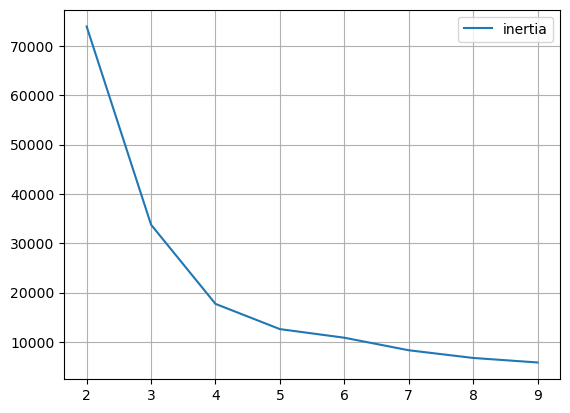

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(df)
x = ss.transform(df)

inertias = pd.DataFrame(data=[], index=range(2, 10), columns=['inertia'])

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    inertias.loc[k] = kmeans.inertia_

inertias.plot()
plt.grid(True)
plt.show()

### Scatterplot using KMeans

<Axes: xlabel='Pickup Centroid Longitude', ylabel='Pickup Centroid Latitude'>

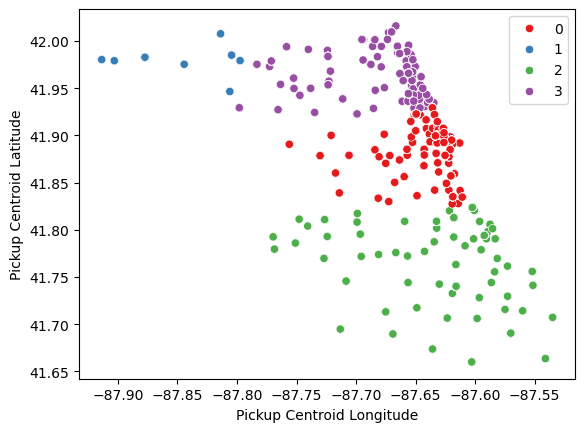

In [8]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(x)

ss.inverse_transform(kmeans.cluster_centers_)

sns.scatterplot(data=df, x=df['Pickup Centroid Longitude'], y=df['Pickup Centroid Latitude'], hue=kmeans.labels_, palette='Set1')

In [9]:
from sklearn.metrics import silhouette_score

silhouette_score_kmeans = silhouette_score(x, kmeans.labels_)
silhouette_score_kmeans

0.7031324453131509

## DBSCAN

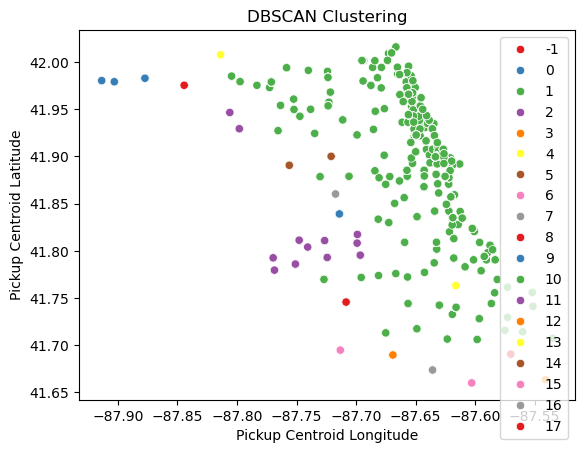

In [10]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(x)

sns.scatterplot(data=df, x=df['Pickup Centroid Longitude'], y=df['Pickup Centroid Latitude'], hue=labels, palette='Set1')
plt.title('DBSCAN Clustering')
plt.show()

In [11]:
silhouette_score_dbscan = silhouette_score(x, labels)
silhouette_score_dbscan

0.23936949929843812

### Hierarchical

In [12]:
# from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# linkage_matrix = linkage(x, method='ward')

# plt.figure(figsize=(12, 6))
# dendrogram(linkage_matrix)
# plt.title('Hierarchical Clustering Dendrogram')
# plt.xlabel('Sample Index')
# plt.ylabel('Distance')
# plt.show()

# distance_threshold = 7  
# labels = fcluster(linkage_matrix, t=distance_threshold, criterion='distance')

# sns.scatterplot(data=df, x=df['Pickup Centroid Longitude'], y=df['Pickup Centroid Latitude'], hue=labels, palette='Set1', s=50)
# plt.title('Hierarchical Clustering')
# plt.show()

# Mopsi Data 

In [13]:
import pandas as pd

df2 = pd.read_csv('MopsiLocationsUntil2012-Finland.txt', sep='\t', names=['latitude', 'longitude'])
df2

,latitude,longitude
0,625983,297439
1,626146,297440
2,626144,297456
3,626004,297394
4,626018,297437
...,...,...
13462,626042,297444
13463,625977,297443
13464,626050,297404
13465,625995,297426


In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13467 entries, 0 to 13466
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   latitude   13467 non-null  int64
 1   longitude  13467 non-null  int64
dtypes: int64(2)
memory usage: 210.6 KB


In [15]:
df2.describe()

,latitude,longitude
count,13467.000000,13467.000000
mean,625094.775897,289004.669043
std,7844.331518,20399.428325
min,599247.000000,212016.000000
25%,625930.000000,296164.000000
50%,626018.000000,297448.000000
75%,626192.000000,297796.500000
max,697835.000000,314328.000000


In [16]:
df2.isna().sum()

latitude     0
longitude    0
dtype: int64

## KMeans

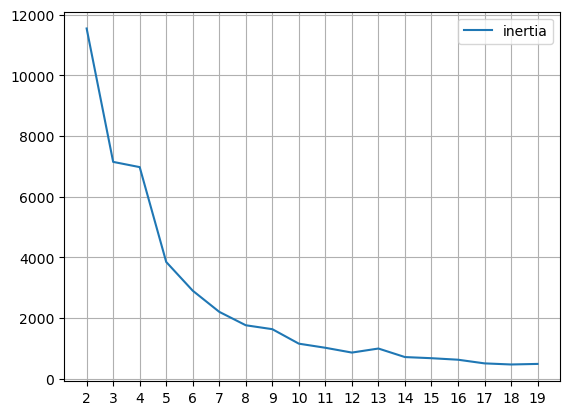

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

kmeans.fit(df2)

ss = StandardScaler()
x = ss.fit(df2)
x = ss.transform(df2)

inertias = pd.DataFrame(data=[], index=range(2, 20), columns=['inertia'])

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    inertias.loc[k] = kmeans.inertia_

kmeans = KMeans(n_clusters=4)

inertias.plot()
plt.xticks(range(2, 20))
plt.grid(True)
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

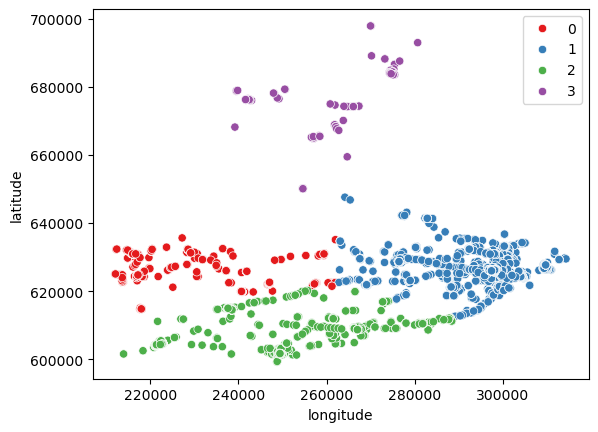

In [18]:
import seaborn as sns

kmeans.fit(x)

ss.inverse_transform(kmeans.cluster_centers_)

sns.scatterplot(data=df2, x=df2.longitude, y=df2.latitude, hue=kmeans.labels_, palette='Set1')

In [19]:
silhouette_score_kmeans = silhouette_score(x, kmeans.labels_)
silhouette_score_kmeans

0.8265734538914362

## DBSCAN

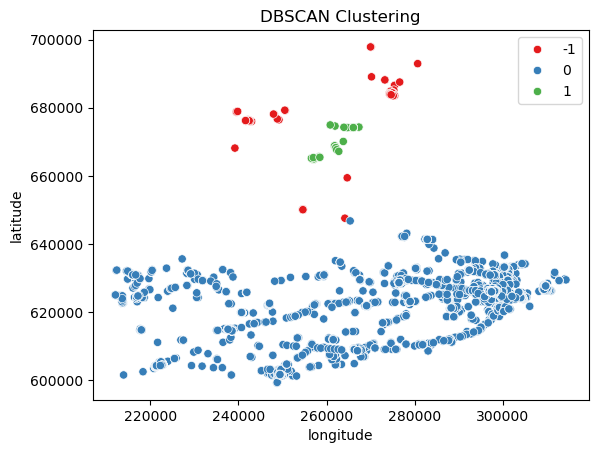

In [20]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=50)
labels = dbscan.fit_predict(x)

sns.scatterplot(data=df2, x=df2.longitude, y=df2.latitude, hue=labels, palette='Set1')
plt.title('DBSCAN Clustering')
plt.show()

In [21]:
silhouette_score_dbscan = silhouette_score(x, labels)
silhouette_score_dbscan

0.809104211944104

## Hierarchical

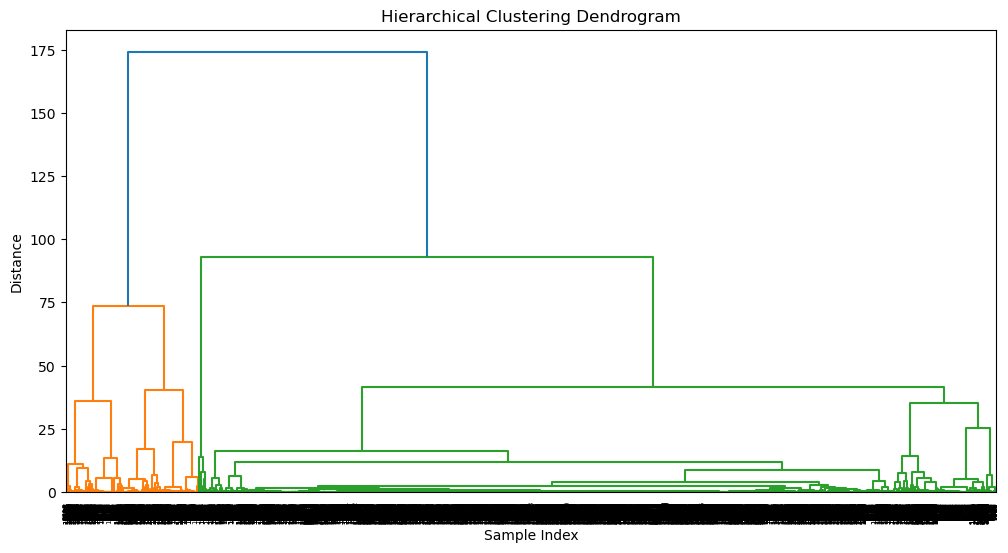

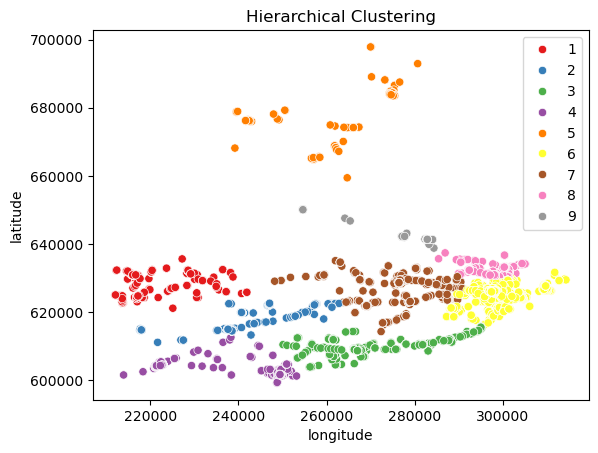

In [22]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

linkage_matrix = linkage(x, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

distance_threshold = 20 
labels = fcluster(linkage_matrix, t=distance_threshold, criterion='distance')

sns.scatterplot(data=df2, x=df2.longitude, y=df2.latitude, hue=labels, palette='Set1')
plt.title('Hierarchical Clustering')
plt.show()

In [23]:
silhouette_score_hierarchical = silhouette_score(x, labels)
silhouette_score_hierarchical

0.7681160856044827